In [1]:
# Neda Mehdizadeh 09/14/2021
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
# Import API key
from config import weather_api_key
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

In [2]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#set the temp_units
temp_units = "imperial"

# define url
query_url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={temp_units}&q="

# List for holding lat_lngs and cities
lat_lngs = []
#Generate Cities List
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=2000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2000)
lat_lngs =zip(lats, lngs)


In [3]:
# Identify nearest city for each lat, lng combination

for lat,lng in lat_lngs:
    city = citipy.nearest_city(lat, lng).city_name
    
# If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count      
len(cities)

701

In [4]:
# Perform API Calls
url = "http://api.openweathermap.org/data/2.5/weather?"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={temp_units}&q="

In [5]:
# Perform a weather check on each city using a series of successive API calls. Include a print log of each city as it'sbeing processed (with the city number and city name).
for city in cities:
    response = requests.get(query_url + city).json()

In [ ]:
# set lists for the datafrzame

city_two = []
cloudiness = []
dates = []
humidities = []
lats = []
lngs = []
max_temps = []
wind_speeds = []
countries = []

# set initial count quantities for organization
count_one = 0
set_one = 1

# loops for creating dataframe columns

for city in cities:
    try:
        response = requests.get(query_url + city.replace(" ","&")).json()
        cloudiness.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lngs.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count_one > 48:
            count_one = 1
            set_one += 1
            city_two.append(city)
        else:
            count_one += 1
            city_two.append(city)
        print(f"Processing Record {count_one} of Set {set_one} | {city}")
    except Exception:
        print("City not found. Skipping...")
print("------------------------------\nData Retrieval Complete\n------------------------------")


Processing Record 1 of Set 1 | dhidhdhoo
Processing Record 2 of Set 1 | sterling
City not found. Skipping...
Processing Record 3 of Set 1 | asau
Processing Record 4 of Set 1 | qaanaaq
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | sri aman
Processing Record 8 of Set 1 | hilo
Processing Record 9 of Set 1 | busselton
City not found. Skipping...
Processing Record 10 of Set 1 | ogulin
Processing Record 11 of Set 1 | luderitz
Processing Record 12 of Set 1 | miraflores
Processing Record 13 of Set 1 | dikson
Processing Record 14 of Set 1 | atuona
Processing Record 15 of Set 1 | rikitea
Processing Record 16 of Set 1 | cherskiy
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | georgetown
Processing Record 19 of Set 1 | hermanus
City not found. Skipping...
Processing Record 20 of Set 1 | loiza
Processing Record 21 of Set 1 | lavumisa
Processing Record 22 of Set 1 | leningradskiy
City not found. Skipping...
Pr

In [ ]:
# Convert Raw Data to DataFrame
df=pd.DataFrame({"City name" : city_two,
                 "Country":countries,
"Cloudiness" : cloudiness,
"Dates" : dates,
"Humidities" :humidities,
"Lats" : lats,
'Lngs' :lngs,
'Max_temps' : max_temps,
"Wind_speeds" :wind_speeds})
df

,City name,Country,Cloudiness,Dates,Humidities,Lats,Lngs,Max_temps,Wind_speeds
0,dhidhdhoo,MV,95,1631668720,76,6.8833,73.1000,83.23,15.37
1,sterling,US,20,1631668596,82,39.0062,-77.4286,80.89,4.61
2,asau,RO,7,1631668613,97,46.4333,26.4000,56.32,3.11
3,qaanaaq,GL,85,1631668721,91,77.4840,-69.3632,17.69,5.82
4,mataura,NZ,10,1631668721,49,-46.1927,168.8643,49.48,5.14
...,...,...,...,...,...,...,...,...,...
685,mecca,SA,16,1631668777,36,21.4267,39.8261,84.09,5.03
686,horsham,GB,33,1631668659,97,51.0640,-0.3272,62.11,8.50
687,nassau,US,1,1631668918,89,40.7507,-73.5829,73.92,1.99
688,altyn-topkan,TJ,0,1631668918,21,40.6528,69.5998,50.47,3.78


In [ ]:
#pick only 500 cities 
weather_df=df.iloc[0:500,:]
weather_df

,City name,Country,Cloudiness,Dates,Humidities,Lats,Lngs,Max_temps,Wind_speeds
0,dhidhdhoo,MV,95,1631668720,76,6.8833,73.1000,83.23,15.37
1,sterling,US,20,1631668596,82,39.0062,-77.4286,80.89,4.61
2,asau,RO,7,1631668613,97,46.4333,26.4000,56.32,3.11
3,qaanaaq,GL,85,1631668721,91,77.4840,-69.3632,17.69,5.82
4,mataura,NZ,10,1631668721,49,-46.1927,168.8643,49.48,5.14
...,...,...,...,...,...,...,...,...,...
495,puerto colombia,ES,75,1631668922,93,36.5939,-6.2330,69.26,6.91
496,fare,PF,2,1631668862,74,-16.7000,-151.0167,78.87,18.77
497,rauma,FI,6,1631668862,67,61.1272,21.5113,44.64,13.65
498,pangnirtung,CA,57,1631668862,67,66.1451,-65.7125,32.38,5.03


In [ ]:
# Output File (CSV)
output_data_file = "Output/weather_df.csv"
# Export the city data into a .csv. Display the DataFrame
weather_df.to_csv(output_data_file )


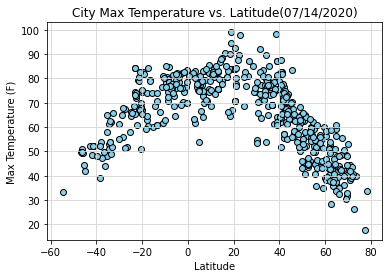

The plot is showing that the closer we get to the EQUATOR the tempratures increase!
It is evident that there is a relationship between the two factors! 


In [ ]:
# Plotting the Data

#  Temperature (F) vs. Latitude Plot

plt.scatter(weather_df["Lats"],weather_df["Max_temps"],edgecolors="black",facecolors="skyblue")
plt.title("City Max Temperature vs. Latitude(07/14/2020)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("figures/fig1.png")
plt.show()
print(f'The plot is showing that the closer we get to the EQUATOR the tempratures increase!')
print('It is evident that there is a relationship between the two factors! ')

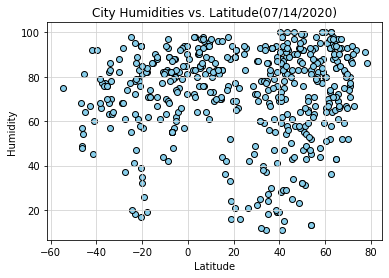

The plot is showing that most cities in the southern Hemisphere are humid whereas in the Northern Hemisphere humidity is variable


In [ ]:
#  Humidity (%) vs. Latitude
plt.scatter(weather_df["Lats"],weather_df["Humidities"],edgecolors="black",facecolors="skyblue")
plt.title("City Humidities vs. Latitude(07/14/2020)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("figures/fig2.png")
plt.show()
print(f'The plot is showing that most cities in the southern Hemisphere are humid whereas in the Northern Hemisphere humidity is variable')


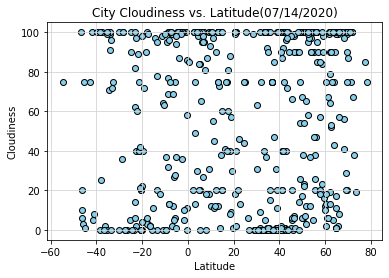

There seems to be no relationship between the two factors! 


In [ ]:
#  Cloudiness (%) vs. Latitude
plt.scatter(weather_df["Lats"],weather_df["Cloudiness"],edgecolors="black",facecolors="skyblue")
plt.title("City Cloudiness vs. Latitude(07/14/2020)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("figures/fig3.png")
plt.show()

print('There seems to be no relationship between the two factors! ')

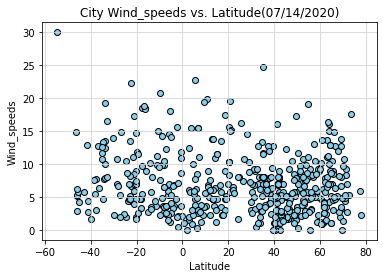

There seems to be no relationship between the two factors! 


In [ ]:
#  Wind Speed (mph) vs. Latitude
plt.scatter(weather_df["Lats"],weather_df["Wind_speeds"],edgecolors="black",facecolors="skyblue")
plt.title("City Wind_speeds vs. Latitude(07/14/2020)")
plt.xlabel("Latitude")
plt.ylabel("Wind_speeds")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.savefig("figures/fig4.png")
plt.show()
print('There seems to be no relationship between the two factors! ')

In [ ]:

# Create Northern and Southern Hemisphere DataFrames
northern_df = weather_df.loc[pd.to_numeric(weather_df["Lats"]).astype(float) > 0, :]
southern_df = weather_df.loc[pd.to_numeric(weather_df["Lats"]).astype(float) < 0, :]


Regression line equation is: y = -0.65x + 89.91
The r-squared is: -0.8063171155315288
The regression displays a negative correlation.
In the nothern hemisphere, as you move away from the equator the temperature decreases.


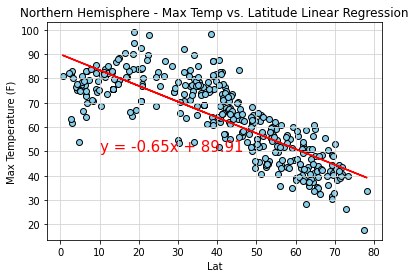

In [ ]:

# create linear regression chart for Northern Hemisphere Temp vs. Latitude
x_values = pd.to_numeric(northern_df['Lats']).astype(float)
y_values = pd.to_numeric(northern_df['Max_temps']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values,edgecolors="black",facecolors="skyblue")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,50),fontsize=15,color="red")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.xlabel('Lat')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
print("In the nothern hemisphere, as you move away from the equator the temperature decreases.")
plt.savefig("figures/fig5.png")
plt.show()

Regression line equation is: y = 0.73x + 82.02
The r-squared is: 0.806140622458253
The regression displays a positive correlation.
In the southern hemisphere, as you get closer to the equator the temperature increases.


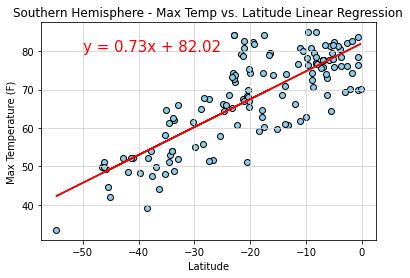

In [ ]:

# create linear regression chart for Southern Hemisphere Temp vs. Latitude
x_values = pd.to_numeric(southern_df['Lats']).astype(float)
y_values = pd.to_numeric(southern_df['Max_temps']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values,edgecolors="black",facecolors="skyblue")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a positive correlation.")
print("In the southern hemisphere, as you get closer to the equator the temperature increases.")
plt.savefig("figures/fig6.png")
plt.show()


Regression line equation is: y = -0.01x + 73.72
The r-squared is: -0.009988915752779375
The regression does not display much of a correlation between the data sets.


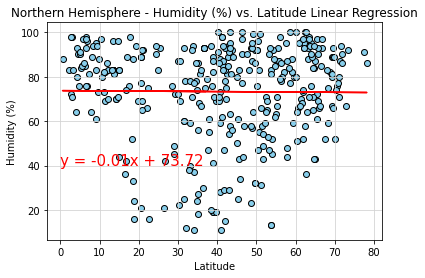

In [ ]:

# create linear regression chart for Northern Hemisphere Humidity vs. Latitude
x_values = pd.to_numeric(northern_df['Lats']).astype(float)
y_values = pd.to_numeric(northern_df['Humidities']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values,edgecolors="black",facecolors="skyblue")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,40),fontsize=15,color="red")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.") 
plt.savefig("figures/fig7.png")
plt.show()


Regression line equation is: y = 0.22x + 75.57
The r-squared is: 0.16362086496258124
The regression does not display much of a correlation between the data sets.


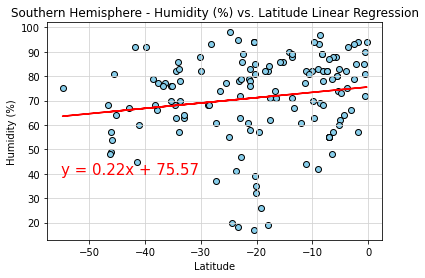

In [ ]:

# create linear regression chart for Southern Hemisphere Humidity vs. Latitude
x_values = pd.to_numeric(southern_df['Lats']).astype(float)
y_values = pd.to_numeric(southern_df['Humidities']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values,edgecolors="black",facecolors="skyblue")
plt.plot(x_values,regress_values,"r-")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.annotate(line_eq,(-55,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.savefig("figures/fig8.png")
plt.show()

Regression line equation is: y = 0.15x + 50.23
The r-squared is: 0.0711819374459089
The regression does not display much of a correlation between the data sets.


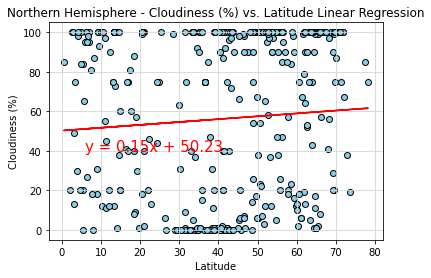

In [ ]:

# create linear regression chart for Northern Hemisphere Cloudiness vs. Latitude
x_values = pd.to_numeric(northern_df['Lats']).astype(float)
y_values = pd.to_numeric(northern_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values,edgecolors="black",facecolors="skyblue")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.savefig("figures/fig9.png")
plt.show()

Regression line equation is: y = 0.25x + 56.58
The r-squared is: 0.07967628565799756
The regression does not display much of a correlation between the data sets.


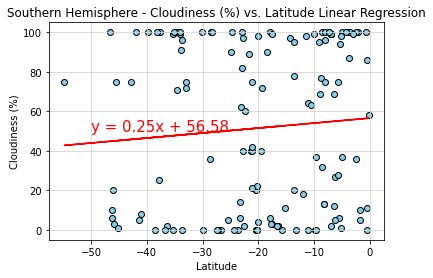

In [ ]:

# create linear regression chart for Southern Hemisphere Cloudiness vs. Latitude
x_values = pd.to_numeric(southern_df['Lats']).astype(float)
y_values = pd.to_numeric(southern_df['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values,edgecolors="black",facecolors="skyblue")
plt.plot(x_values,regress_values,"r-")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.annotate(line_eq,(-50,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.savefig("figures/fig10.png")
plt.show()

Regression line equation is: y = -0.01x + 6.65
The r-squared is: -0.027175936478670688
The regression does not display much of a correlation between the data sets.


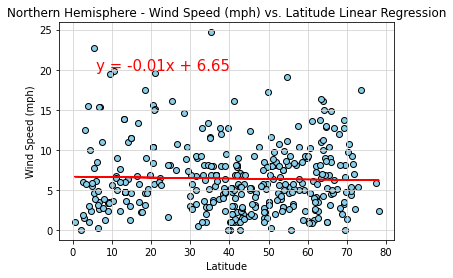

In [ ]:

# create linear regression chart for Northern Hemisphere Wind Speed vs. Latitude
x_values = pd.to_numeric(northern_df['Lats']).astype(float)
y_values = pd.to_numeric(northern_df['Wind_speeds']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values,edgecolors="black",facecolors="skyblue")
plt.plot(x_values,regress_values,"r-")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.annotate(line_eq,(6,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.savefig("figures/fig11.png")
plt.show()

Regression line equation is: y = -0.07x + 6.42
The r-squared is: -0.17674677602729333
The regression does not display much of a correlation between the data sets.


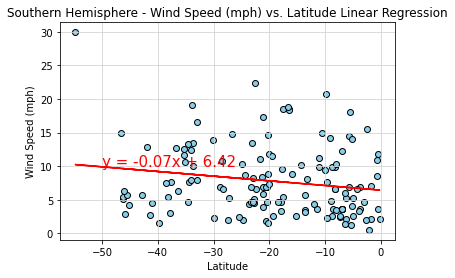

In [ ]:

# create linear regression chart for Southern Hemisphere Wind Speed vs. Latitude
x_values = pd.to_numeric(southern_df['Lats']).astype(float)
y_values = pd.to_numeric(southern_df['Wind_speeds']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}")
plt.scatter(x_values,y_values,edgecolors="black",facecolors="skyblue")
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.grid (b=True,which="major",axis="both",linestyle="-",color="lightgrey")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression does not display much of a correlation between the data sets.")
plt.savefig("figures/fig12.png")
plt.show()
